<a href="https://colab.research.google.com/github/pawanraj77/pawanraj77/blob/main/HealthRx30_Hackathon_June22_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 62.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=e24551fbfa381fd08e29f3bfe9121f3ee4ee46e05a4be69af3f365cd0cf25ece
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

In [71]:
data=pd.read_table('/content/drive/MyDrive/Colab Notebooks/amazon0601.txt',delimiter=' ')
data=data[[data.columns[0]]]
data[['source','target']]=data['#'].str.split('\t',expand=True)
data.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# source target
0     #      #   None
1     #      #   None
2     #      #   None
3  0\t1      0      1
4  0\t2      0      2
5  0\t3      0      3
6  0\t4      0      4
7  0\t5      0      5
8  0\t6      0      6
9  0\t7      0      7

In [72]:
data=data[[*data.columns[1:]]]
data=data.tail(data.shape[0]-3)
data.head()

source target
3      0      1
4      0      2
5      0      3
6      0      4
7      0      5

In [69]:
len(data)

3387388

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/amazon-meta.txt') as f:
  lines = f.readlines()
f.close()
lines

['# Full information about Amazon Share the Love products\n',
 'Total items: 548552\n',
 '\n',
 'Id:   0\n',
 'ASIN: 0771044445\n',
 '  discontinued product\n',
 '\n',
 'Id:   1\n',
 'ASIN: 0827229534\n',
 '  title: Patterns of Preaching: A Sermon Sampler\n',
 '  group: Book\n',
 '  salesrank: 396585\n',
 '  similar: 5  0804215715  156101074X  0687023955  0687074231  082721619X\n',
 '  categories: 2\n',
 '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]\n',
 '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]\n',
 '  reviews: total: 2  downloaded: 2  avg rating: 5\n',
 '    2000-7-28  cutomer: A2JW67OY8U6HHK  rating: 5  votes:  10  helpful:   9\n',
 '    2003-12-14  cutomer: A2VE83MZF98ITY  rating: 5  votes:   6  helpful:   5\n',
 '\n',
 'Id:   2\n',
 'ASIN: 0738700797\n',
 '  title: Candlemas: Feast of Flames\n',
 '  group: Book\n',
 '  salesrank: 168596\n',
 '  si

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Dataframe').getOrCreate()

In [ ]:
df_pyspark = spark.read.option('header', 'true').text('/content/drive/MyDrive/Colab Notebooks/amazon-meta.txt')

In [ ]:
df_pyspark.printSchema()

root
 |-- value: string (nullable = true)



In [ ]:
df_pyspark.show()

+--------------------+
|               value|
+--------------------+
|# Full informatio...|
| Total items: 548552|
|                    |
|             Id:   0|
|    ASIN: 0771044445|
|  discontinued pr...|
|                    |
|             Id:   1|
|    ASIN: 0827229534|
|  title: Patterns...|
|         group: Book|
|   salesrank: 396585|
|  similar: 5  080...|
|       categories: 2|
|   |Books[283155]...|
|   |Books[283155]...|
|  reviews: total:...|
|    2000-7-28  cu...|
|    2003-12-14  c...|
|                    |
+--------------------+
only showing top 20 rows



In [ ]:
df_pyspark.head(20)

[Row(value='# Full information about Amazon Share the Love products'),
 Row(value='Total items: 548552'),
 Row(value=''),
 Row(value='Id:   0'),
 Row(value='ASIN: 0771044445'),
 Row(value='  discontinued product'),
 Row(value=''),
 Row(value='Id:   1'),
 Row(value='ASIN: 0827229534'),
 Row(value='  title: Patterns of Preaching: A Sermon Sampler'),
 Row(value='  group: Book'),
 Row(value='  salesrank: 396585'),
 Row(value='  similar: 5  0804215715  156101074X  0687023955  0687074231  082721619X'),
 Row(value='  categories: 2'),
 Row(value='   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]'),
 Row(value='   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]'),
 Row(value='  reviews: total: 2  downloaded: 2  avg rating: 5'),
 Row(value='    2000-7-28  cutomer: A2JW67OY8U6HHK  rating: 5  votes:  10  helpful:   9'),
 Row(value='    2003-12-14  cutomer: A2VE83MZF98ITY  rating

In [ ]:
df_pyspark.show()

+--------------------+
|               value|
+--------------------+
|# Full informatio...|
| Total items: 548552|
|                    |
|             Id:   0|
|    ASIN: 0771044445|
|  discontinued pr...|
|                    |
|             Id:   1|
|    ASIN: 0827229534|
|  title: Patterns...|
|         group: Book|
|   salesrank: 396585|
|  similar: 5  080...|
|       categories: 2|
|   |Books[283155]...|
|   |Books[283155]...|
|  reviews: total:...|
|    2000-7-28  cu...|
|    2003-12-14  c...|
|                    |
+--------------------+
only showing top 20 rows



In [139]:
collect=['Id', 'group', 'salesrank', 'similar']
for line in lines[10]:
  if 'Id' in lines:
    if 'group' in lines+3:
      if 'salesrank' in lines+4:
          if 'similar' in lines+5:
             collect.append(str.split([':'] and ['group'])

SyntaxError: ignored

In [ ]:
import networkx as nx
import numpy as np
import pylab as pl
import scipy as sp
import time
import random
import queue
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
meta_data = '/content/drive/MyDrive/Colab Notebooks/amazon-meta.txt'
transaction_data = '/content/drive/MyDrive/Colab Notebooks/amazon0601.txt'

In [73]:
G = nx.from_pandas_edgelist( 
    data,
    create_using=nx.MultiGraph())

In [101]:
degree_sequence = sorted(((d,n) for n, d in G.degree()), reverse=True)
deg_data=pd.DataFrame(degree_sequence)
deg_data['logarithm_base10']=np.deg_data.groupby([deg_data.columns[0]]).count())
deg_data.head()

SyntaxError: ignored

In [ ]:
g = nx.read_edgelist(transaction_data)

In [129]:
N, K = g.order(), g.size()
avg_deg = N/K

print("Number of nodes: ", N)
print("Number of edges: ", K)
print("Average degree: ", avg_deg)

Number of nodes:  403394
Number of edges:  2443408
Average degree:  0.16509481838481335


In [130]:
from typing import ValuesView
degrees = g.degree()
degrees_vals = g.degree()
degrees_vals = sorted(set(degrees_vals))
hist = [list(degrees.values()).count(v) for v in degrees.items]

AttributeError: ignored

In [66]:
g.degree()

DegreeView({'0': 11, '1': 10, '2': 10, '3': 10, '4': 285, '5': 566, '6': 323, '7': 37, '8': 67, '9': 171, '10': 45, '155': 373, '185': 304, '233': 78, '234': 99, '235': 160, '3943': 59, '47': 192, '54': 113, '118': 166, '355': 121, '34': 411, '44': 361, '4954': 50, '4955': 31, '36': 498, '48': 476, '58': 135, '106': 221, '1032': 31, '1033': 19, '46': 307, '49': 348, '50': 2281, '51': 341, '52': 709, '53': 164, '55': 232, '56': 172, '57': 199, '108': 168, '1521': 34, '1522': 41, '59': 19, '60': 151, '61': 13, '62': 170, '63': 112, '15328': 23, '1034': 13, '1035': 35, '11': 17, '12': 140, '13': 24, '14': 33, '15': 7, '16': 10, '17': 10, '18': 45, '19': 47, '20': 89, '21': 115, '24': 113, '26': 93, '27': 112, '30': 80, '31': 60, '209': 123, '22': 27, '23': 43, '25': 39, '64': 73, '65': 35, '66': 18, '67': 26, '74': 49, '75': 120, '76': 65, '134': 45, '1107': 33, '69': 67, '105': 366, '401': 86, '443': 155, '1590': 55, '78': 77, '266': 101, '451': 31, '1148': 197, '2440': 137, '215': 56, '

In [131]:
print('Clustering coefficient of node 1:')
print(nx.clustering(g, ['1']))

Clustering coefficient of node 1:
{'1': 0.24444444444444444}


In [132]:
clust_coefficients = nx.clustering(g)
print(type(clust_coefficients))
avg_clust = sum(clust_coefficients.values()) / len(clust_coefficients)
print(avg_clust)

<class 'dict'>
0.41768123430510284


In [133]:
nx.average_clustering(g)

0.41768123430510284

In [91]:
bet_cen = nx.betweenness_centrality(g)
clo_cen = nx.closeness_centrality(g)
eig_cen = nx.eigenvector_centrality(g)

KeyboardInterrupt: ignored

In [134]:
def get_top_keys(dictionary, top):
    items = list(dictionary.items())
    items.sort(reverse=True, key=lambda x: x[1])
    return list(map(lambda x: x[0], items[:top]))

In [137]:
degree_sequence = sorted(((d,n) for n, d in G.degree()), reverse=True)
deg_data=pd.DataFrame(degree_sequence)
deg_data=deg_data.groupby([deg_log(data.columns[0]]).count())
deg_data.head()

SyntaxError: ignored

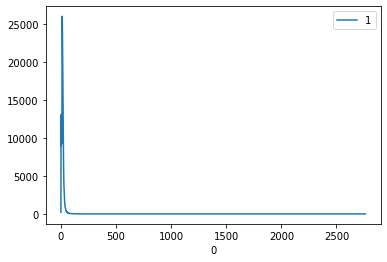

In [136]:
deg_data.plot()

In [106]:
def category_similarity(A, B):
   nominator = A.intersection(B) 
   denominator = A.union(B)
   similarity= len(nominator)/len(denominator)
   return similarity

In [113]:
def get_subgraph_bfs(graph, start_node, num_node):
    # TODO: Function docs
    # TODO: Input checking
    # TODO: Testing
    node_set = set()
    probbed = {start_node}
    bfs_queue = queue.deque()
    bfs_queue.append(start_node)
    while len(bfs_queue) > 0:
        i = bfs_queue.popleft()
        node_set.add(i)
        for j in g[i]:
            if j not in probbed:
                probbed.add(j)
                bfs_queue.append(j)
        if len(node_set) >= num_node:
            return nx.subgraph(graph, node_set)

In [125]:
sub1k = get_subgraph_bfs(g, '1', 1000)

In [126]:
bet_cen_sub1k = nx.betweenness_centrality(sub1k)

In [127]:
bet_cen_sub1k['1']

0.022162131340964307

In [128]:
get_top_keys(bet_cen_sub1k, 10)

['185', '155', '4', '5', '89', '36', '48', '6', '44', '233']

In [145]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Spark_App').getOrCreate()

In [147]:
dataDict = '/content/drive/MyDrive/Colab Notebooks/amazon-meta.txt'

In [ ]:
# pivotDF = df.groupBy("Id").pivot("group")

In [151]:
df = spark.read.option('header', 'true').text('/content/drive/MyDrive/Colab Notebooks/amazon-meta.txt')
df.printSchema()
df.show(truncate=False)

root
 |-- value: string (nullable = true)

+---------------------------------------------------------------------------------------------------------------+
|value                                                                                                          |
+---------------------------------------------------------------------------------------------------------------+
|# Full information about Amazon Share the Love products                                                        |
|Total items: 548552                                                                                            |
|                                                                                                               |
|Id:   0                                                                                                        |
|ASIN: 0771044445                                                                                               |
|  discontinued product                      

In [159]:
df3 = df.rdd.map (lambda x: \
                 (x.value['Id'], x.value['ASIN'], x.value['title'], x.value['group'], x.value['salesrank'], x.value['similar'], x.value['categories'], x.value['reviews'])) \
                 .toDF(['Id', 'ASIN', 'title', 'group', 'salesrank', 'similar', 'categories', 'reviews'])
df3.printSchema()


Py4JJavaError: ignored